In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

In [2]:
model_data_path = "{}/{}".format(base_path,'model_wise_network_results/part-00000-7a27c6d7-9ffe-473d-a97f-1df5deb661ba-c000.csv')
print(model_data_path)

/Users/bhavani.sankar/Desktop/Proj/Asurion/Tasks/emily_data/1_network_analysis/model_wise_network_results/part-00000-7a27c6d7-9ffe-473d-a97f-1df5deb661ba-c000.csv


In [3]:
node_size_path = "{}/{}".format(base_path,'node_size_res_20191031/part-00000-2b41f33f-c137-418d-b7f6-d8bda070119c-c000.csv')
print(node_size_path)

/Users/bhavani.sankar/Desktop/Proj/Asurion/Tasks/emily_data/1_network_analysis/node_size_res_20191031/part-00000-2b41f33f-c137-418d-b7f6-d8bda070119c-c000.csv


In [4]:
node_size_df = pd.read_csv(node_size_path)
node_size_df.head()

,main_properties_maker,test_name,test_name_count
0,SONY,gyroscope,16237
1,FUJITSU,sdcard_detect,598
2,ZTE,int_storage_rw,286
3,GOOGLE,batt_charging,100
4,ZTE,accelerometer,6264


In [5]:
model_df = pd.read_csv(model_data_path)
model_df.head()

,main_properties_maker,test_state1,test_state2,agg_sum_weight
0,SHARP,batt_discharge_check,bt_hw_support,837
1,LG,last_restart,livewallpaper_usage,1037
2,SAMSUNG,gyroscope,tether_status,68
3,SAMSUNG,ambient_light,livewallpaper_usage,84
4,SONY,barometer,last_restart,97


In [6]:
model_list = model_df['main_properties_maker'].drop_duplicates().tolist()
model_list

['SHARP',
 'LG',
 'SAMSUNG',
 'SONY',
 'HUAWEI',
 'ZTE',
 'APPLE',
 'GOOGLE',
 'FUJITSU']

In [7]:
uniqiue_test_list = []
for i in range(1,len(model_list)+1):
    list_pos = i-1
    filter_node_df = node_size_df[node_size_df['main_properties_maker']== model_list[list_pos]]
    curr_tests_list = filter_node_df['test_name'].drop_duplicates().tolist()
    uniqiue_test_list = list(set(uniqiue_test_list+curr_tests_list))
len(uniqiue_test_list)

33

In [8]:
pos= {'int_storage_rw': [-0.29702048,  0.17887913],
 'wifi_status': [ 0.00065988, -0.38431687],
 'livewallpaper_usage': [0.04226591, 0.26397706],
 'radio_tech': [0.33039506, 0.03179106],
 'sdcard_detect': [0.35014945, 0.20879058],
 'ram_usage': [0.25154961, -0.17872341],
 'screen_timeout': [-0.09109435,  0.51720731],
 'batt_charging': [0.03642654, 0.01784875],
 'nfc_hw_support': [-0.49295446,  0.04587556],
 'tether_status': [-0.1291961 ,  0.13791012],
 'nfc_status': [0.03479891, 0.46872711],
 'gps_coordinates': [-0.44317198,  0.32315414],
 'tether_hw_support': [-0.43190375,  0.16418163],
 'brightness_setting': [-0.36427275, -0.0398176 ],
 'gps_hw_support': [-0.21441354, -0.02313621],
 'wifi_hw_support': [ 0.12944517, -0.28412878],
 'batt_discharge_check': [-0.2986204 ,  0.35359223],
 'bt_status': [ 0.36019758, -0.09650029],
 'ambient_light': [ 0.01124329, -0.2482286 ],
 'int_storage_capacity': [0.14970375, 0.41811916],
 'gps_status': [-0.10959718,  0.32389664],
 'sdcard_storage_capacity': [0.17260075, 0.2142045 ],
 'gyroscope': [ 0.19682828, -0.03747188],
 'last_restart': [-0.31184746, -0.20479365],
 'barometer': [-0.11438807, -0.19168248],
 'batt_charge_capacity': [ 0.53288019, -0.64365216],
 'accelerometer': [0.2785646 , 0.32047538],
 'bt_hw_support': [-0.18522562, -0.33597201],
 'sim_state': [-0.22777973,  0.46225049],
 'location_service_status': [ 0.80457376, -0.49156135],
 'sdcard_rw': [-0.45269676, -0.15885887],
 'magnetic_sensor': [ 0.11154905, -0.13203667],
 'location_service_coordinates': [ 0.37035085, -1.        ]}

In [9]:
def print_graph(df,maker_name,pos,node_size):
    #df = df[df['main_properties_maker'] == maker_name]
    #df['agg_sum_weight_adjusted'] = 15*df['agg_sum_weight']/max(df['agg_sum_weight'])
    G = nx.from_pandas_edgelist(df,'test_state1','test_state2', edge_attr='agg_sum_weight_adjusted')
    durations = [i['agg_sum_weight_adjusted'] for i in dict(G.edges).values()]
    labels = [i for i in dict(G.nodes).keys()]
    labels = {i:i for i in dict(G.nodes).keys()}
    fig, ax = plt.subplots(figsize=(25,25))
    plt.title(maker_name)
    #pos = nx.spring_layout(G)
    node_size=[v for v in node_size.values()]
    nx.draw_networkx_nodes(G, pos, ax = ax, labels=True, node_size=node_size,node_color='#f00c0c')
    nx.draw_networkx_edges(G, pos, width=durations, ax=ax, edge_color='#555555')
    _ = nx.draw_networkx_labels(G, pos, labels, ax=ax, font_size=16)


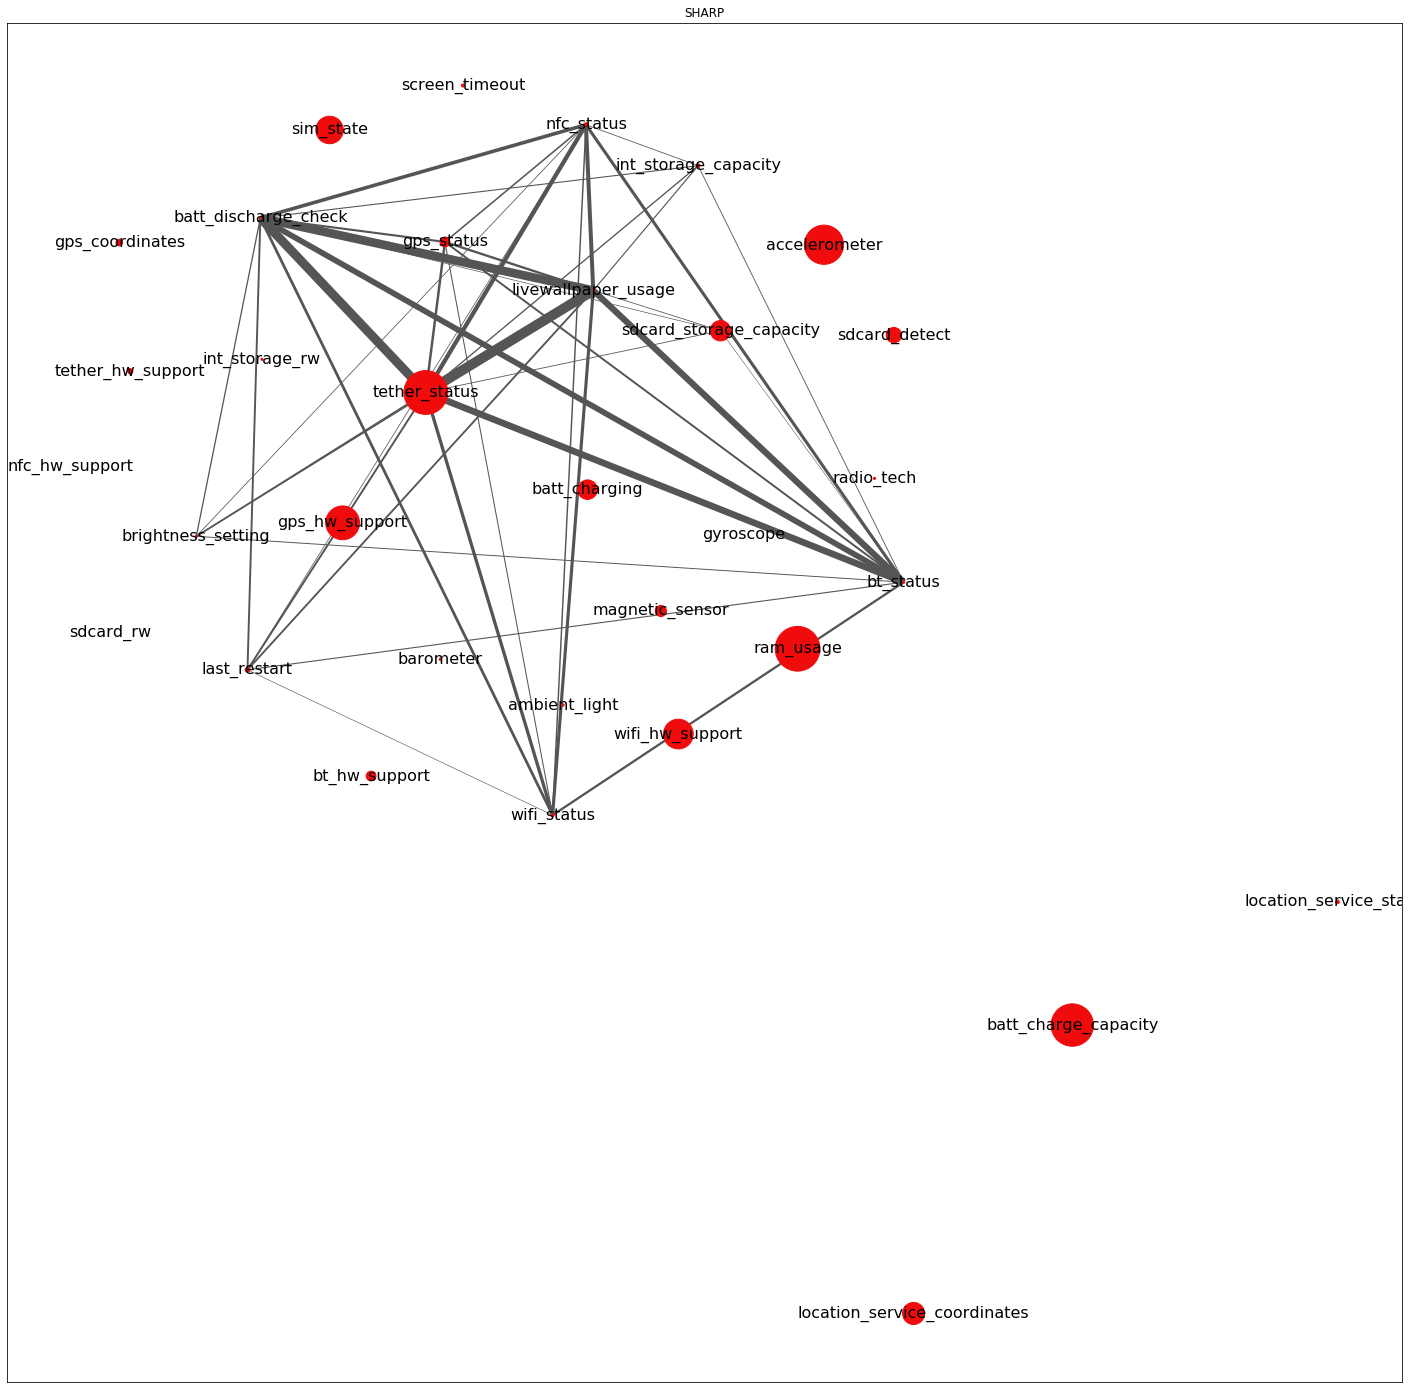

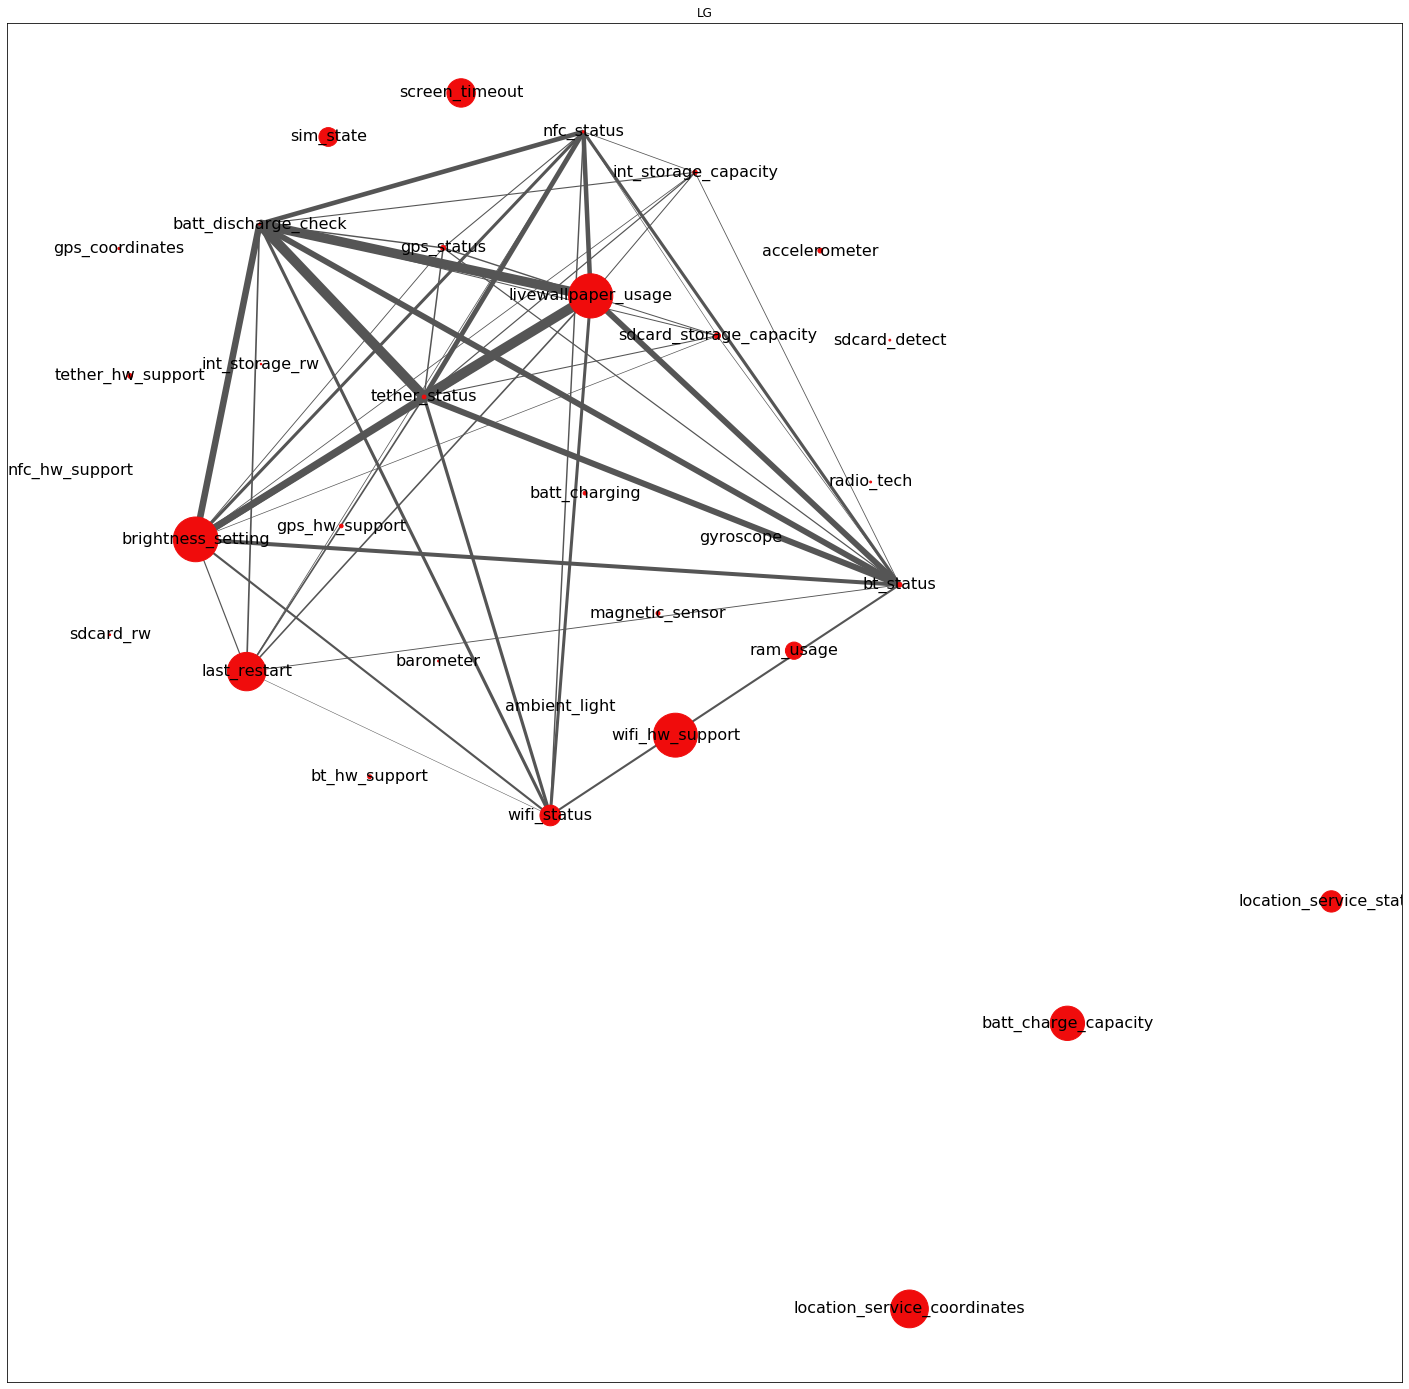

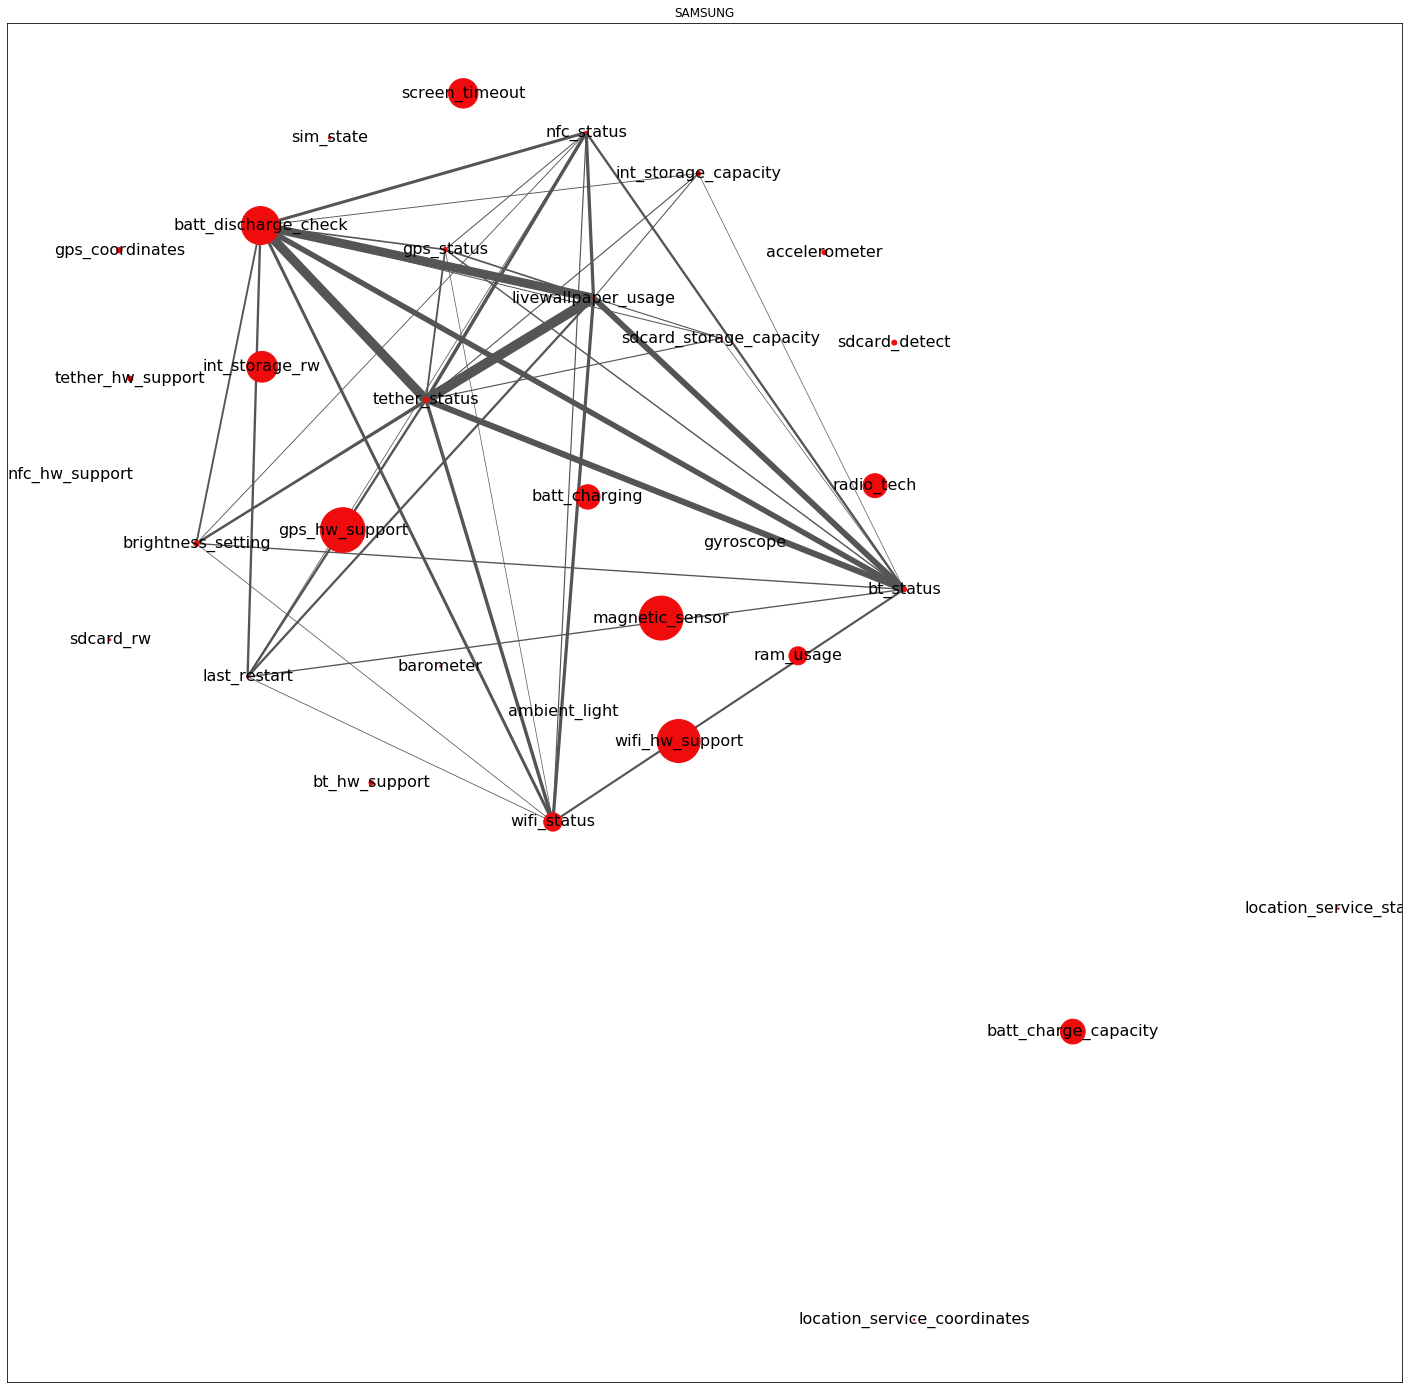

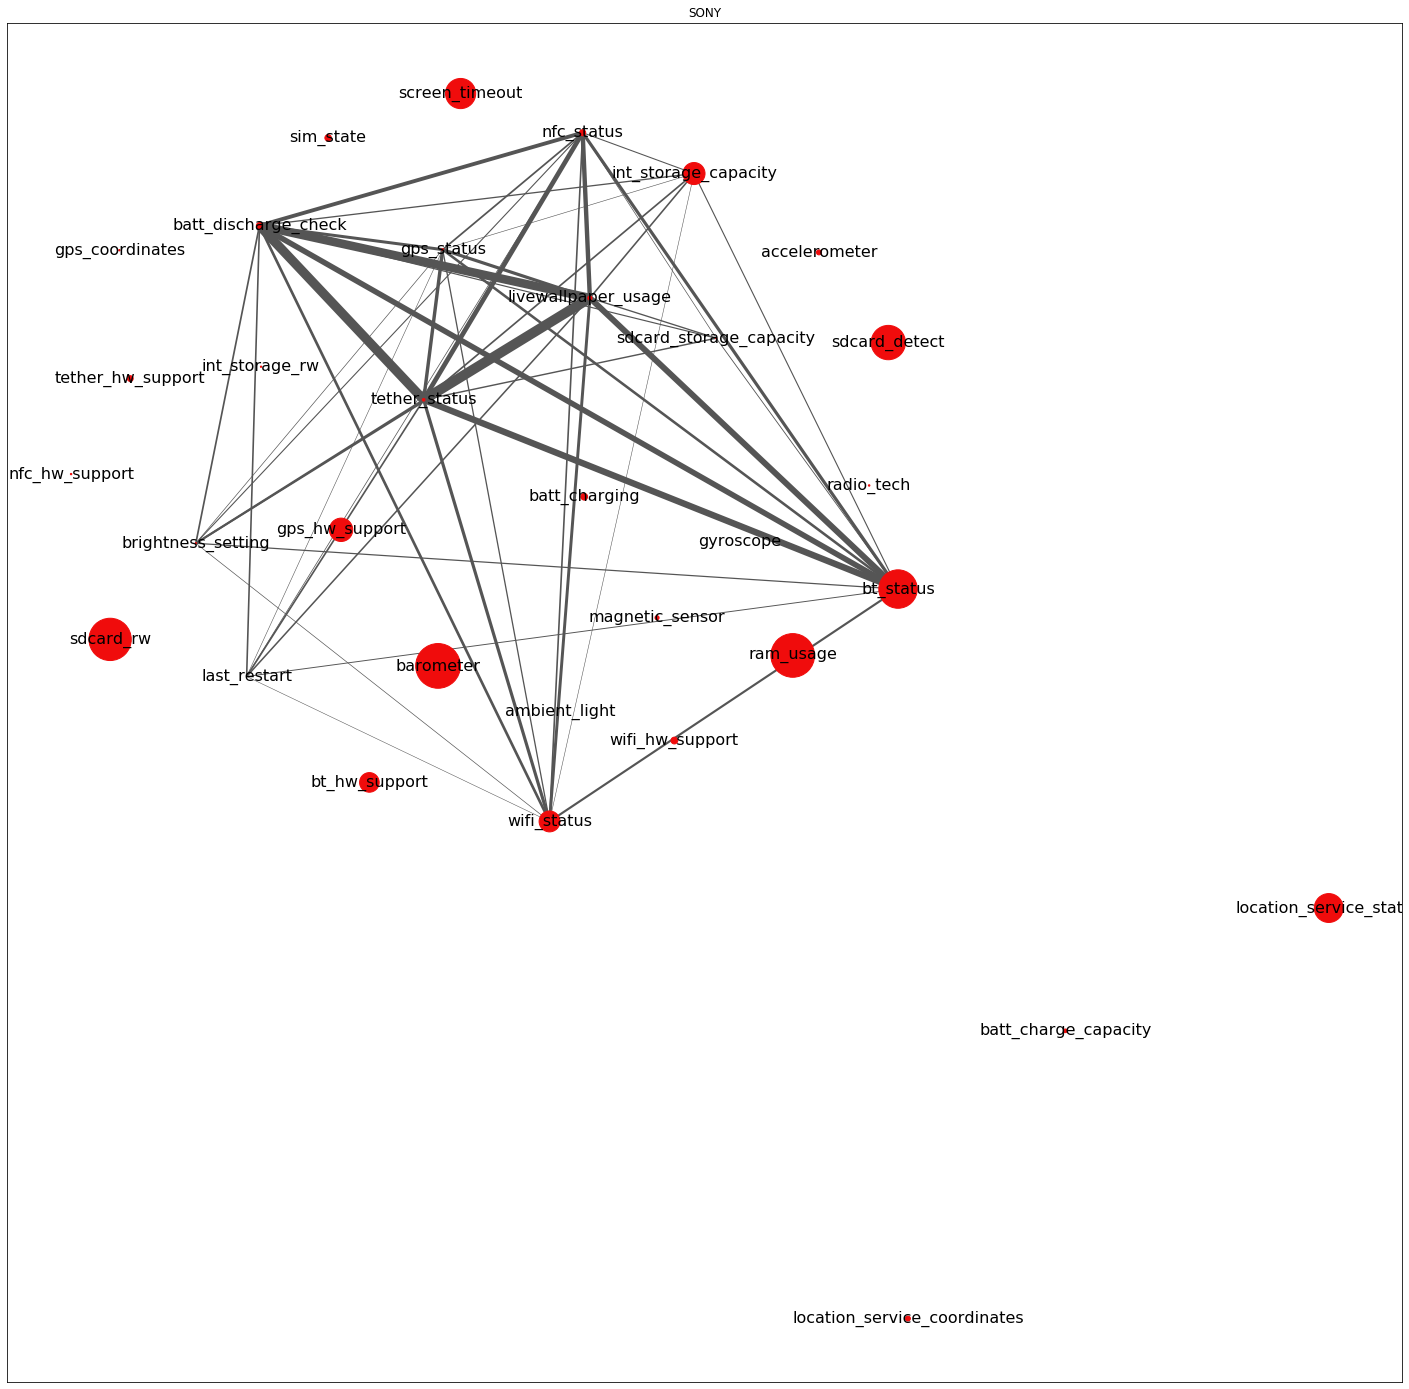

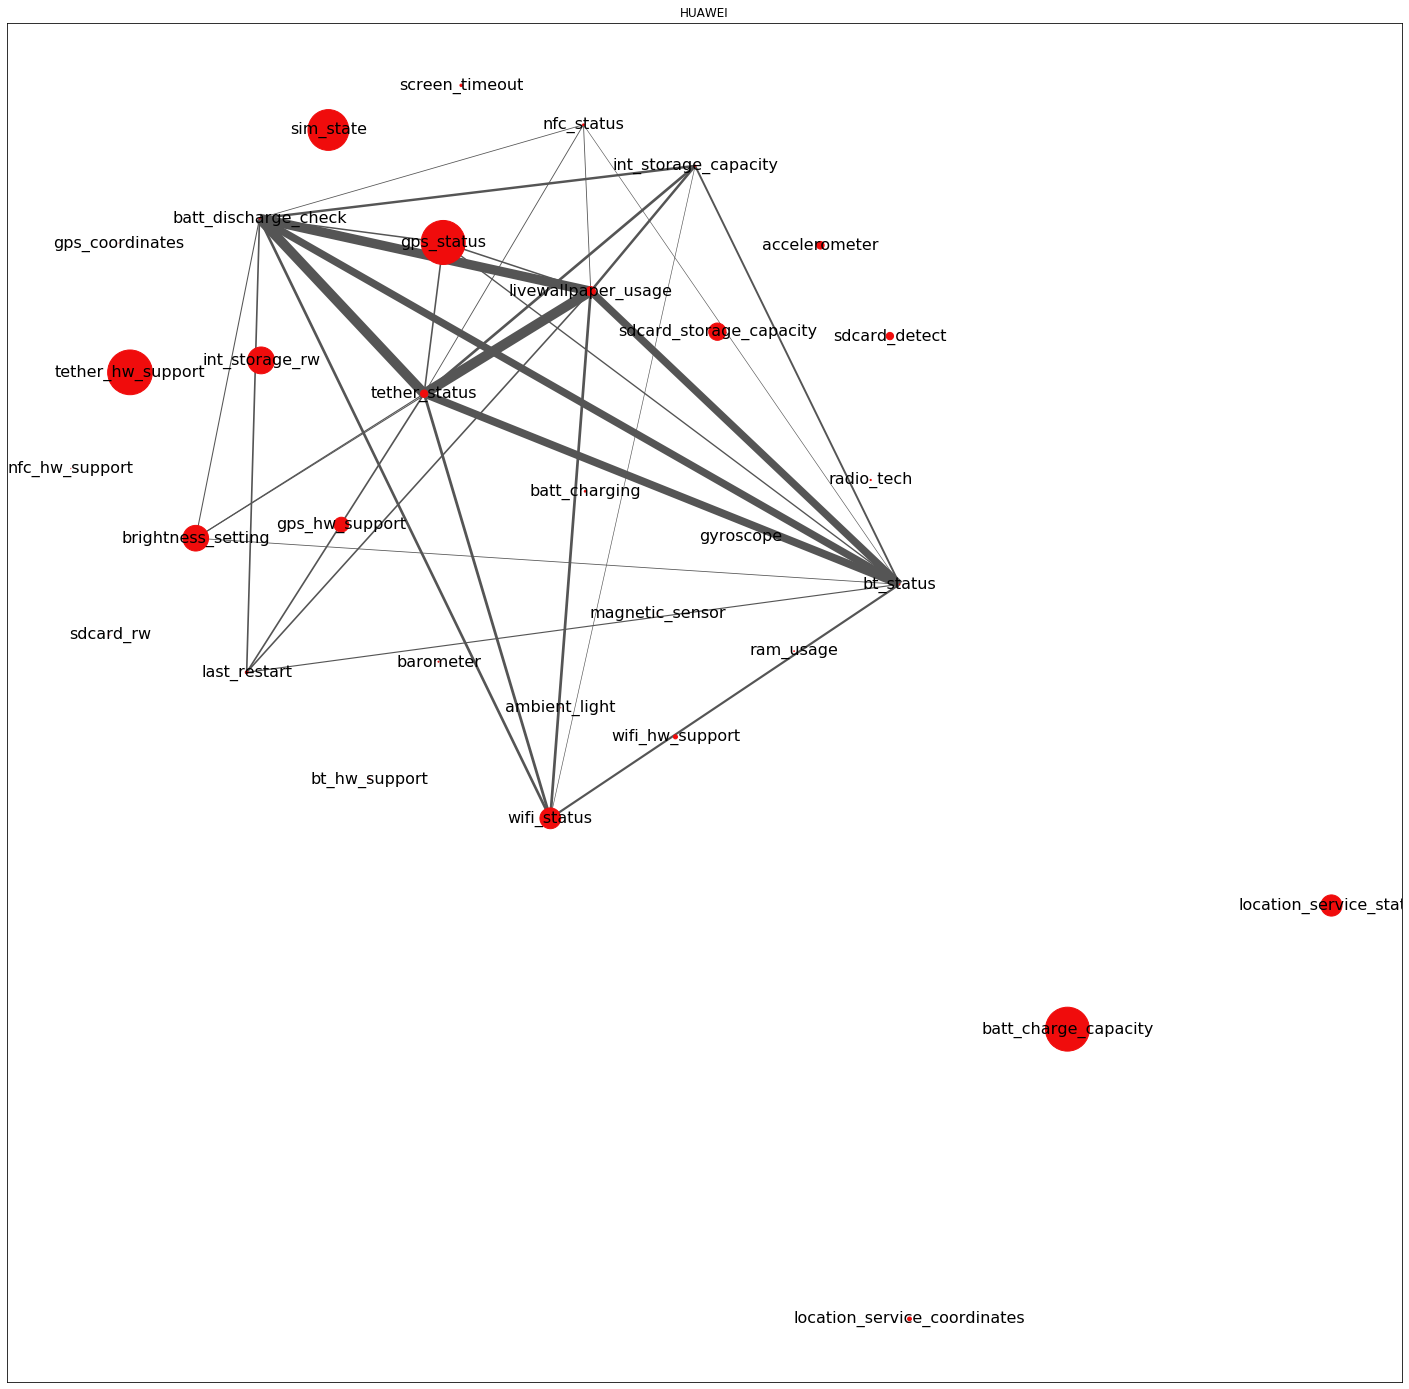

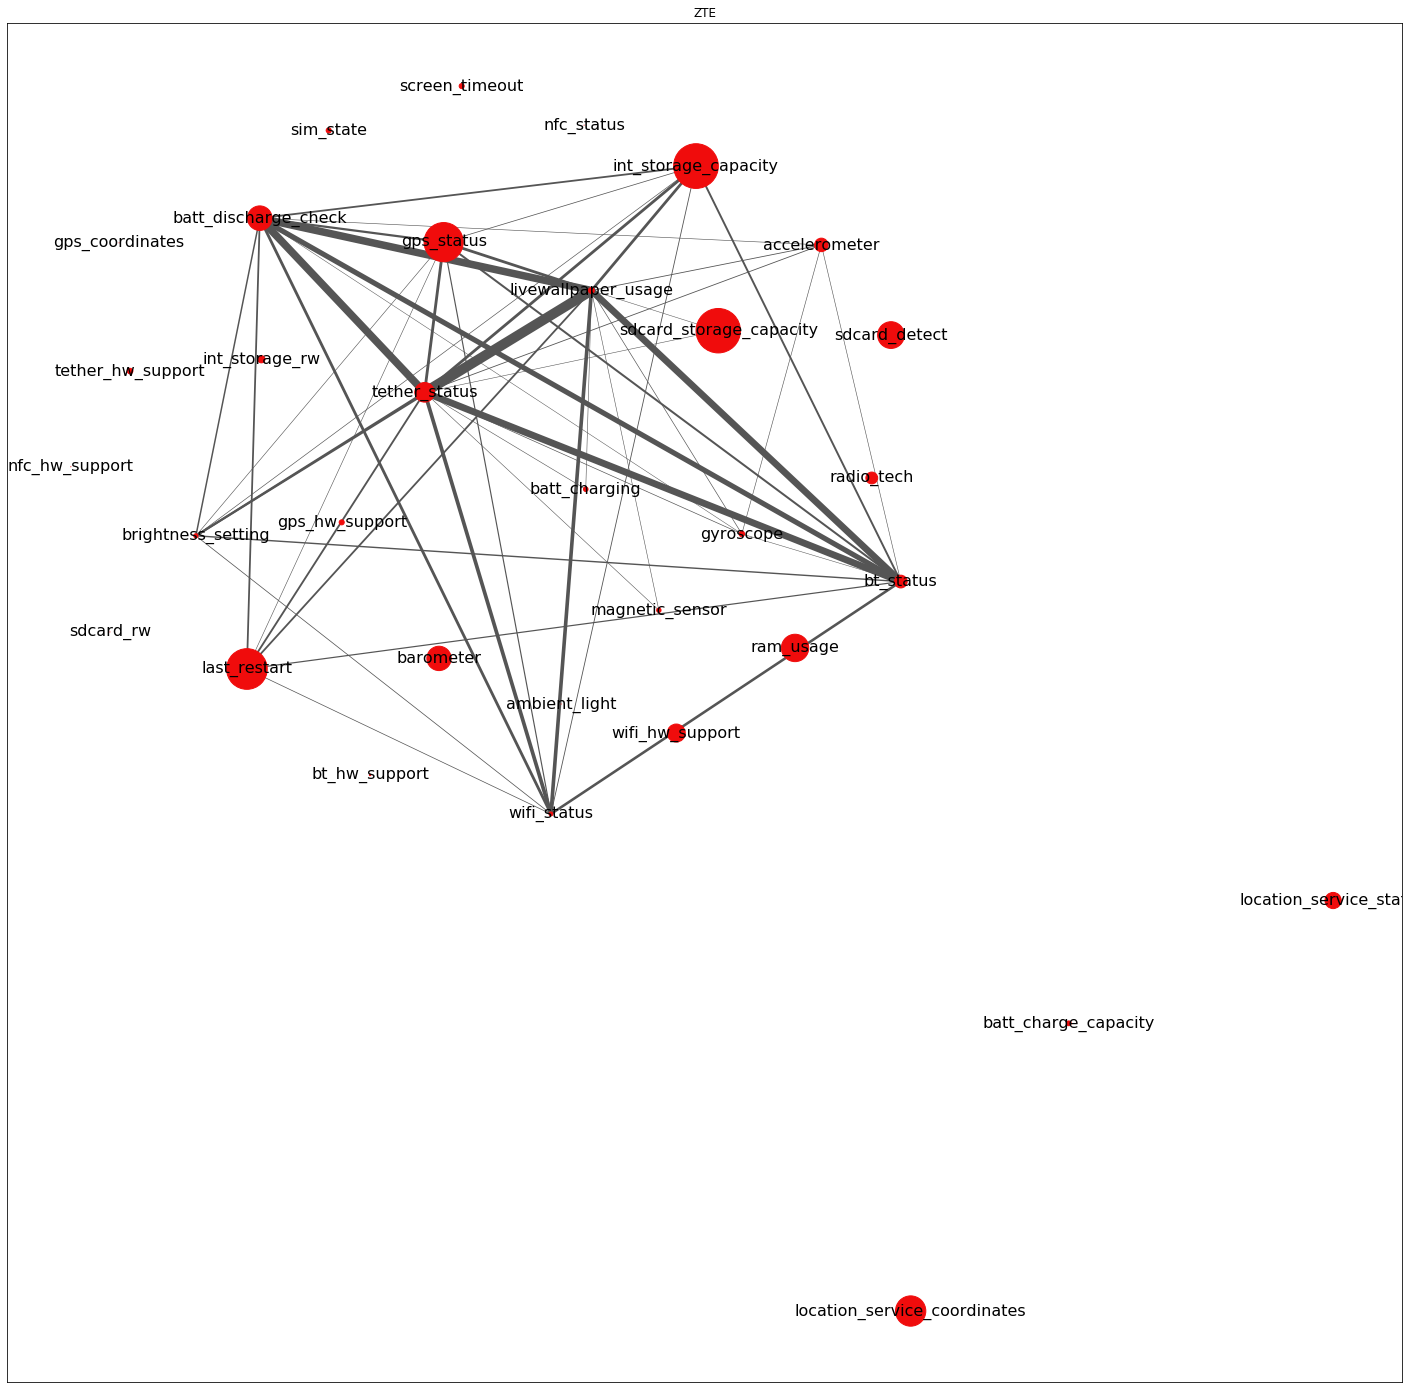

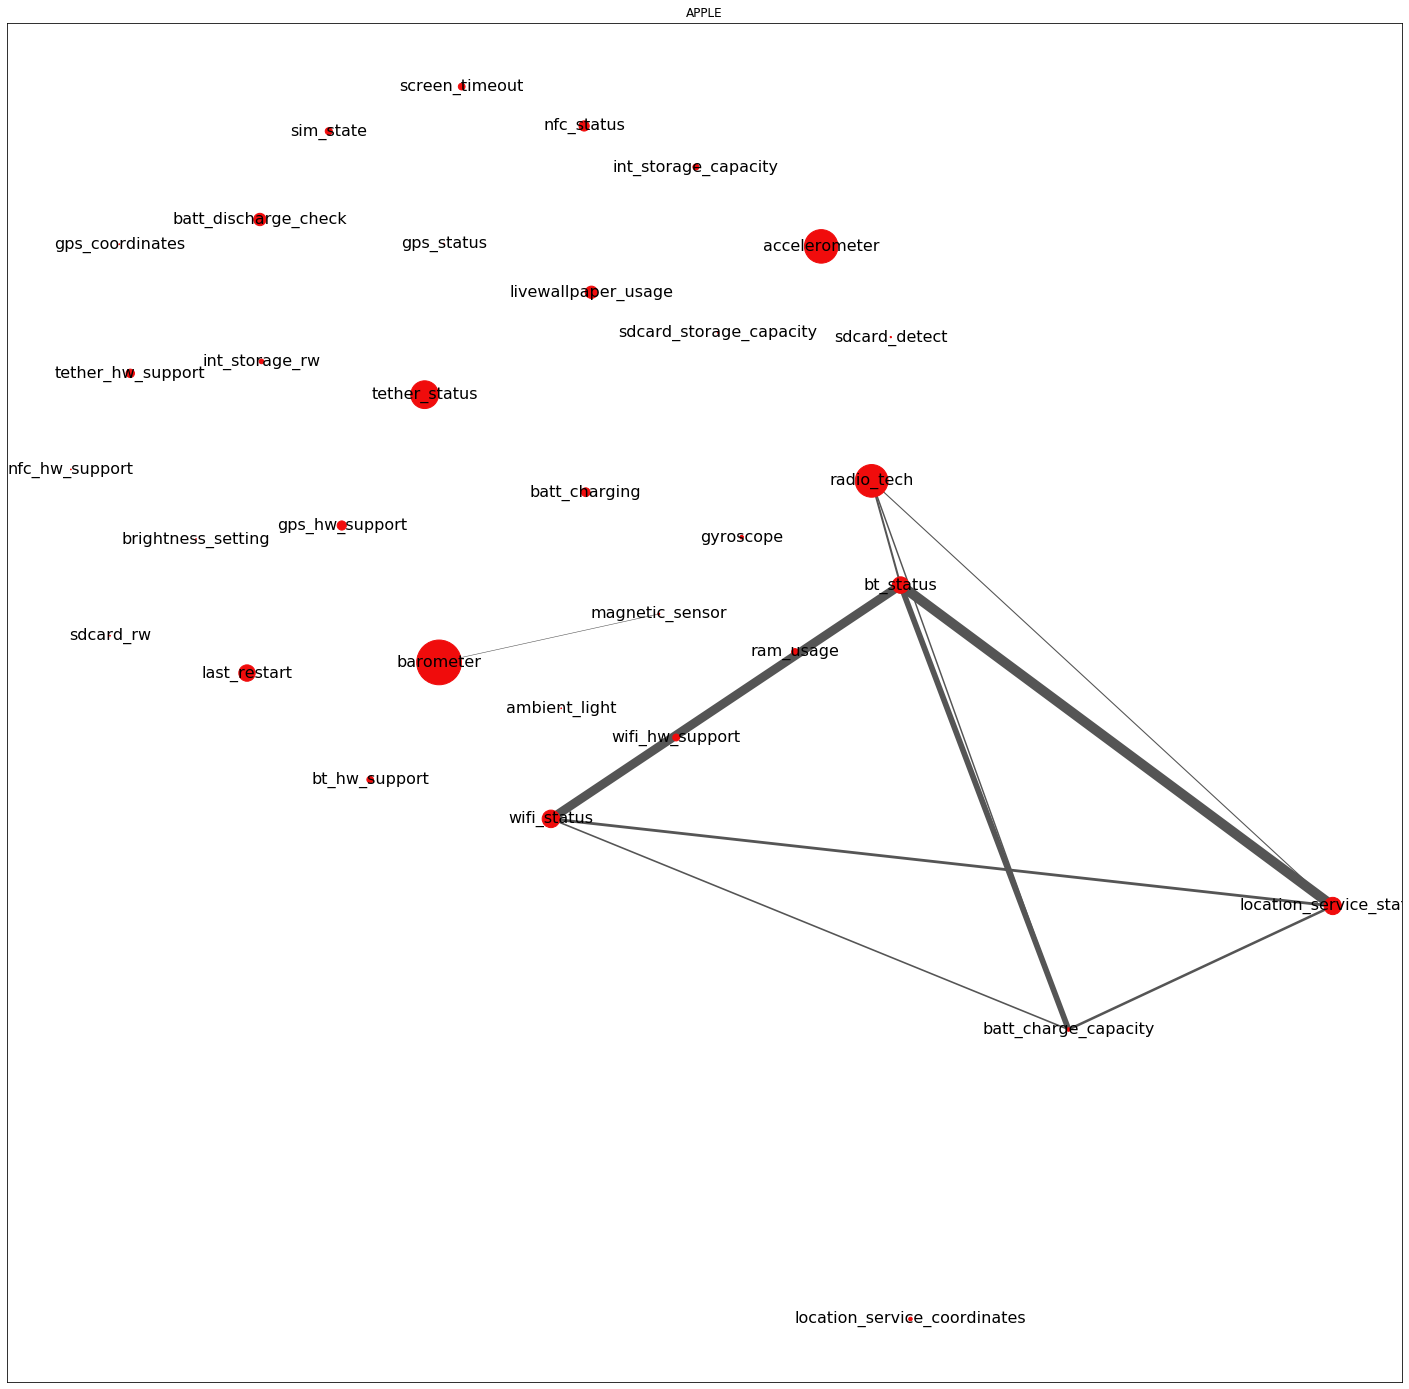

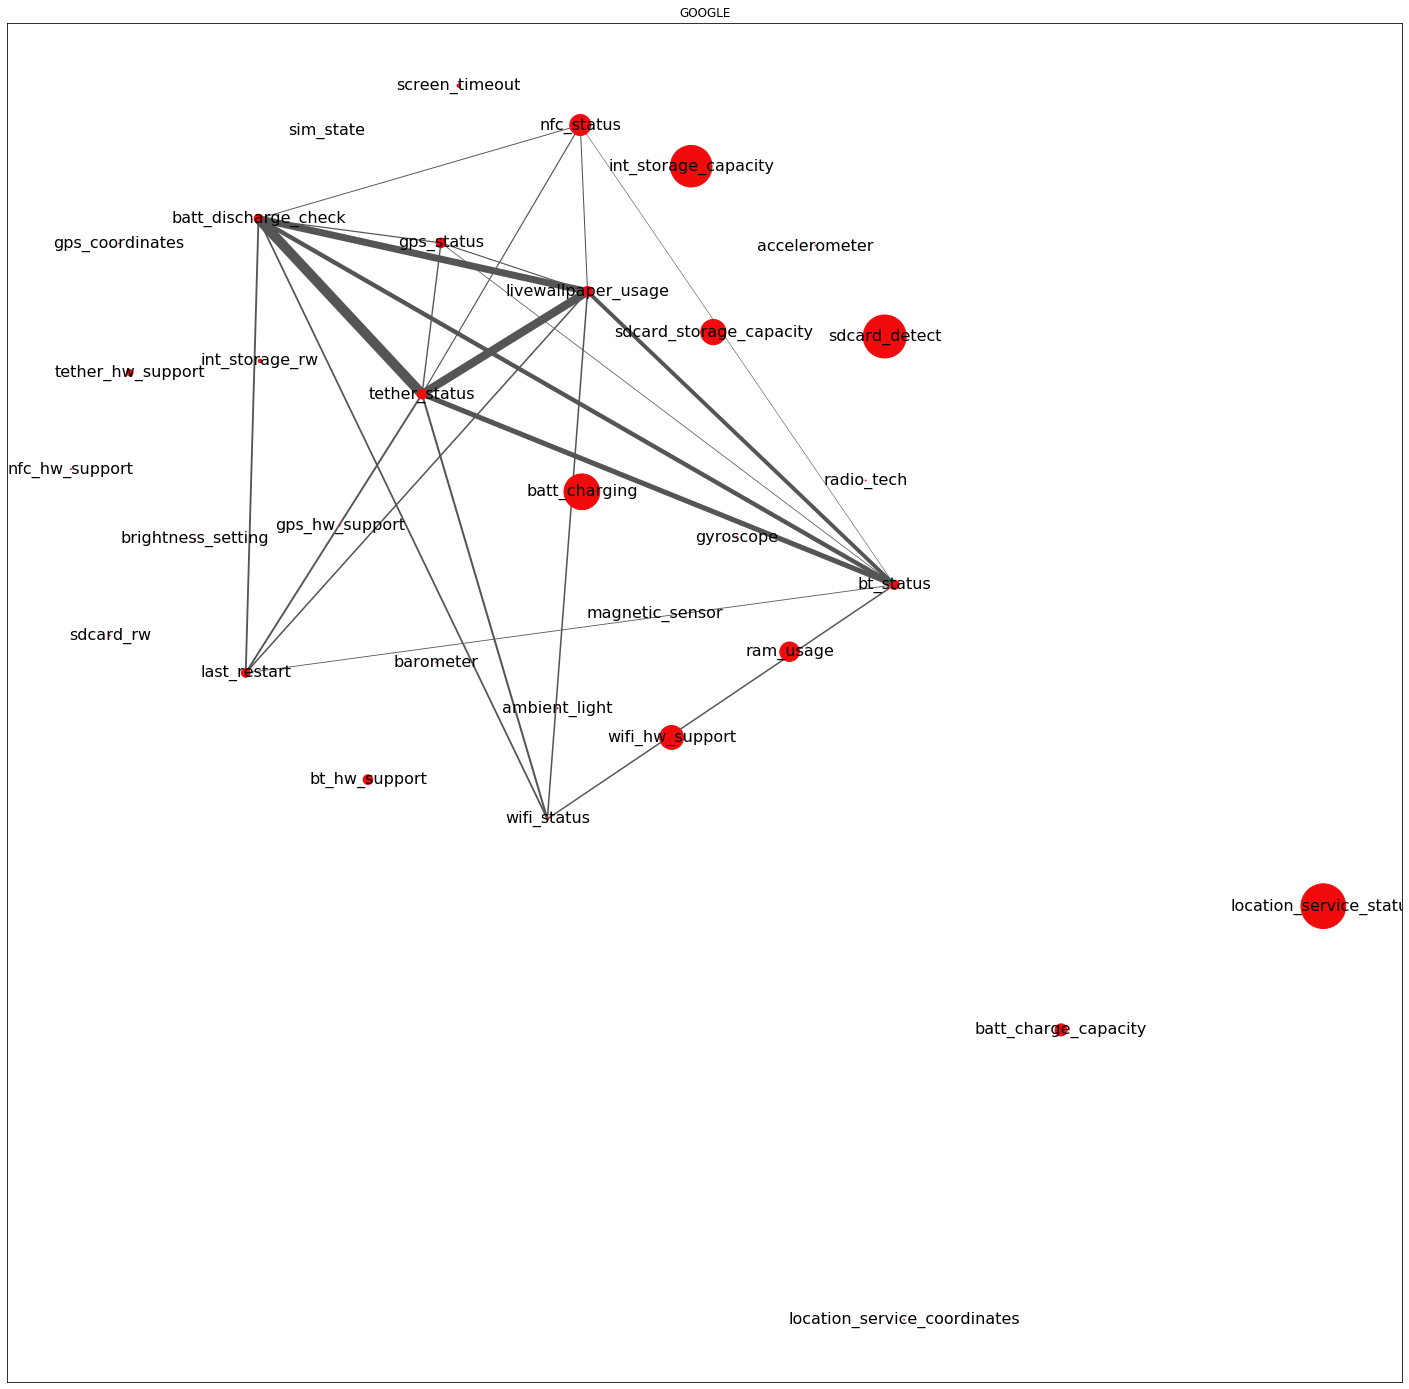

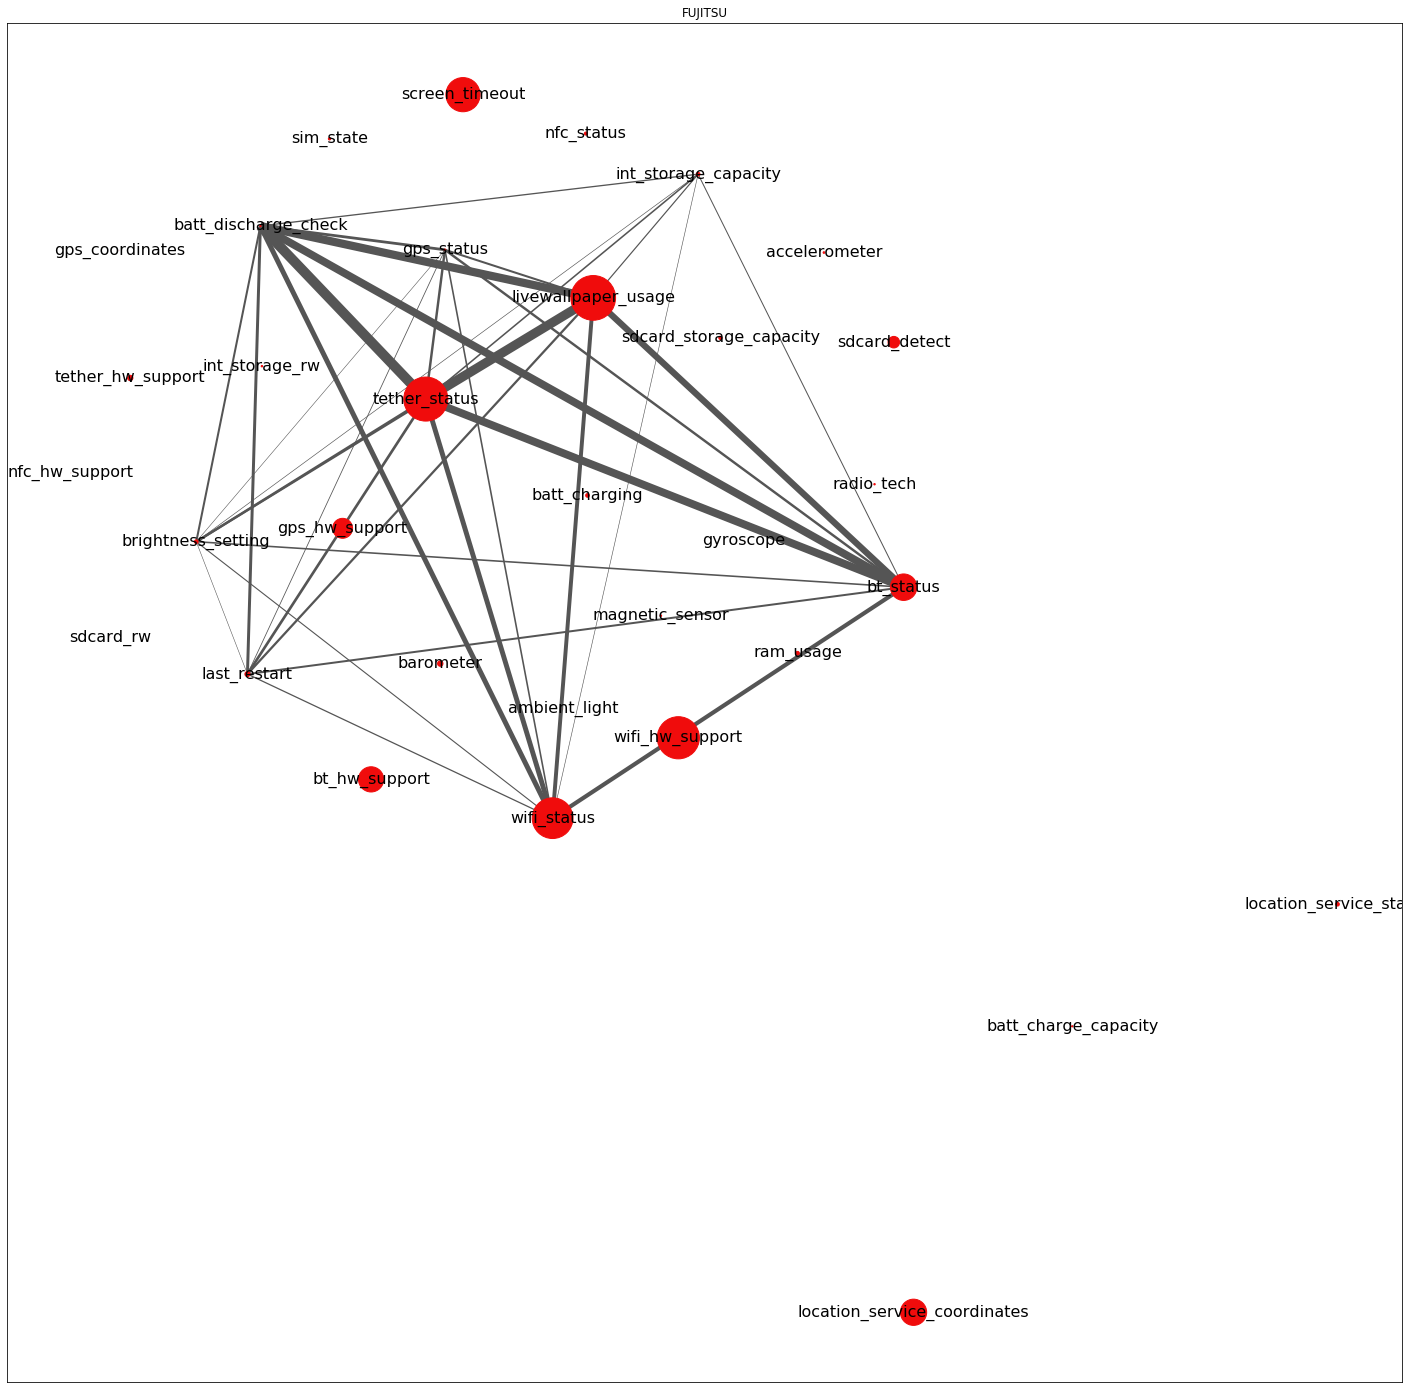

In [10]:
for i in range(1,len(model_list)+1):
    fill_list =[]
    model_type_pos = i-1
    model_type = model_list[model_type_pos]
    #unqiue_test_list = list(set(unqiue_test_list+curr_tests_list))
    threshold_value = 0.5
    filter_model_df = model_df[model_df['main_properties_maker']==model_type]
    filter_model_df['agg_sum_weight_adjusted'] = 10*filter_model_df['agg_sum_weight']/max(filter_model_df['agg_sum_weight'])
    filter_model_df=filter_model_df[filter_model_df['agg_sum_weight_adjusted']>=threshold_value]
    l1= filter_model_df['test_state1'].drop_duplicates().tolist()
    l2 = filter_model_df['test_state2'].drop_duplicates().tolist()
    df_cols_list = list(set(l1+l2))
    missed_tests_list = list(set(uniqiue_test_list) - set(df_cols_list))
    missed_tests_list = [("APPLE",i,i,0,0) for i in missed_tests_list]
    missed_list_df = pd.DataFrame(missed_tests_list,columns=['main_properties_maker','test_state1','test_state2','agg_sum_weight','agg_sum_weight_adjusted'])
    new_model_df = pd.concat([filter_model_df,missed_list_df],ignore_index=True)
    filter_node_df = node_size_df[node_size_df['main_properties_maker']== model_type]
    curr_dict = filter_node_df.set_index('test_name').T.to_dict('index')
    curr_tests_list = filter_node_df['test_name'].drop_duplicates().tolist()

    max_value = max(curr_dict['test_name_count'].values())
    for item in uniqiue_test_list:
        if not item in curr_dict['test_name_count']:
            curr_dict['test_name_count'][item]= 1

        else:
            curr_dict['test_name_count']
    final_curr_dict = {k: 2000*v/max_value for k,v in curr_dict['test_name_count'].items()}
    print_graph(new_model_df,model_type,pos,final_curr_dict)

    
    